In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno
import math
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [4]:
dataset_hour = pd.read_csv('hour.csv', sep=',')
dataset_hour.head() 

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [84]:
dataset_day = pd.read_csv('day.csv',sep = ',')
dataset_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [8]:
dataset_hour.shape

(17379, 17)

In [9]:
dataset_day.shape

(731, 16)

In [11]:
dataset_hour.columns.values

array(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday',
       'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum',
       'windspeed', 'casual', 'registered', 'cnt'], dtype=object)

In [12]:
dataset_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
instant       17379 non-null int64
dteday        17379 non-null object
season        17379 non-null int64
yr            17379 non-null int64
mnth          17379 non-null int64
hr            17379 non-null int64
holiday       17379 non-null int64
weekday       17379 non-null int64
workingday    17379 non-null int64
weathersit    17379 non-null int64
temp          17379 non-null float64
atemp         17379 non-null float64
hum           17379 non-null float64
windspeed     17379 non-null float64
casual        17379 non-null int64
registered    17379 non-null int64
cnt           17379 non-null int64
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [17]:
# Describing all the Numerical Features
dataset_hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [6]:
dataset_hour.season.unique()

array([1, 2, 3, 4])

In [19]:
# Describing all the Categorical Features
dataset_hour.describe(include=['O'])

,dteday
count,17379
unique,731
top,2012-06-09
freq,24


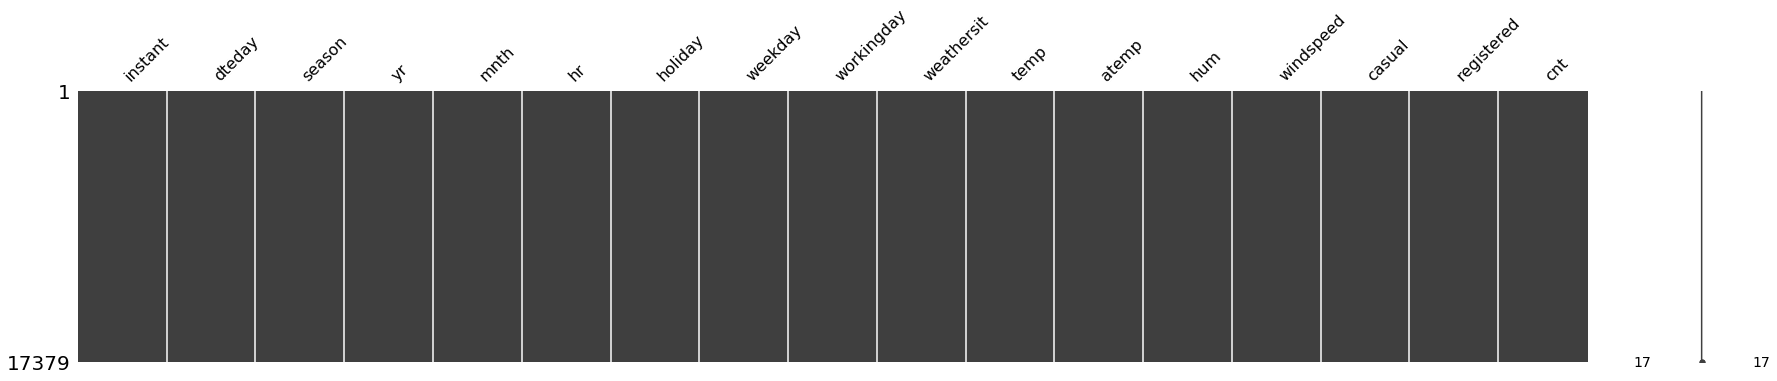

In [5]:
# How many missing values are there in the dataset?
missingno.matrix(dataset_hour, figsize = (30,5))

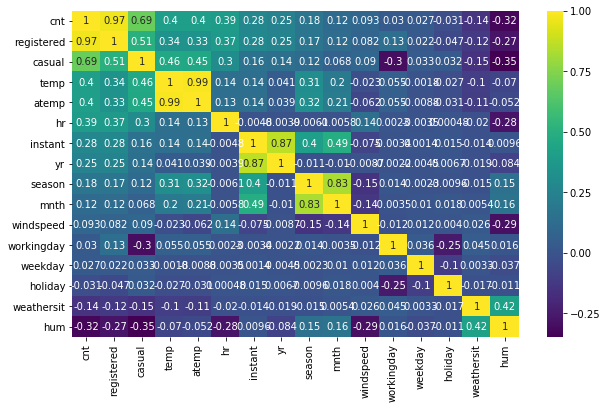

In [9]:
#Quality correlation matrix
k = 17 #number of variables for heatmap
cols = dataset_hour.corr().nlargest(k, 'cnt')['cnt'].index
cm = dataset_hour[cols].corr()
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, cmap = 'viridis')

In [19]:
df = dataset_hour.drop(['dteday'],axis = 1).drop(['instant'],axis = 1)

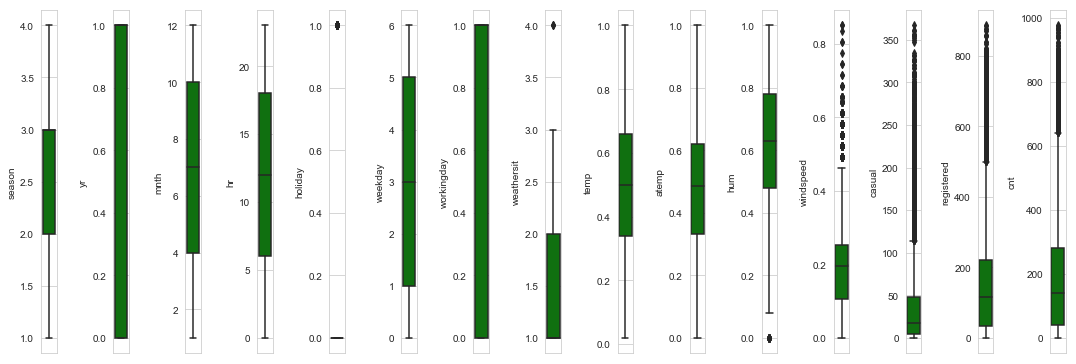

In [20]:
l = df.columns.values
number_of_columns=16
number_of_rows = len(l)-1/number_of_columns
plt.figure(figsize=(number_of_columns,5*number_of_rows))
for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.set_style('whitegrid')
    sns.boxplot(df[l[i]],color='green',orient='v')
    plt.tight_layout()

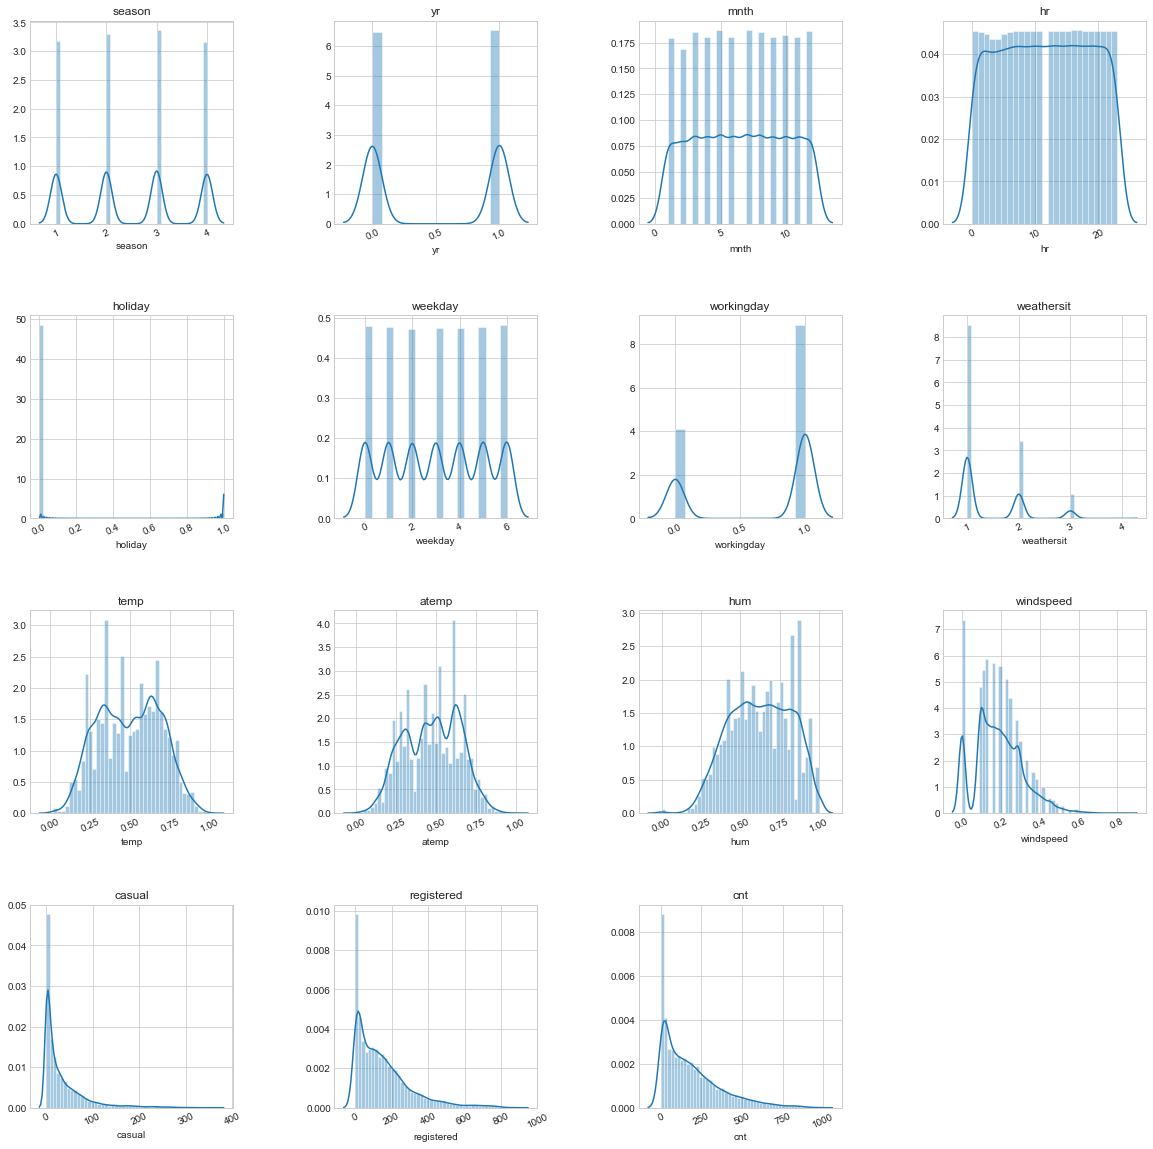

In [33]:
# Let’s plot the distribution of each feature
def plot_distribution(dataset, cols=5, width=20, height=15, hspace=0.2, wspace=0.5):
    plt.style.use('seaborn-whitegrid')
    fig = plt.figure(figsize=(width,height))
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=wspace, hspace=hspace)
    rows = math.ceil(float(dataset.shape[1]) / cols)
    for i, column in enumerate(dataset.columns):
        ax = fig.add_subplot(rows, cols, i + 1)
        ax.set_title(column)
        if dataset.dtypes[column] == np.object:
            g = sns.countplot(y=column, data=dataset)
            substrings = [s.get_text()[:18] for s in g.get_yticklabels()]
            g.set(yticklabels=substrings)
            plt.xticks(rotation=25)
        else:
            g = sns.distplot(dataset[column])
            plt.xticks(rotation=25)
    
plot_distribution(df, cols=4, width=20, height=20, hspace=0.45, wspace=0.5)

/Users/zijian/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


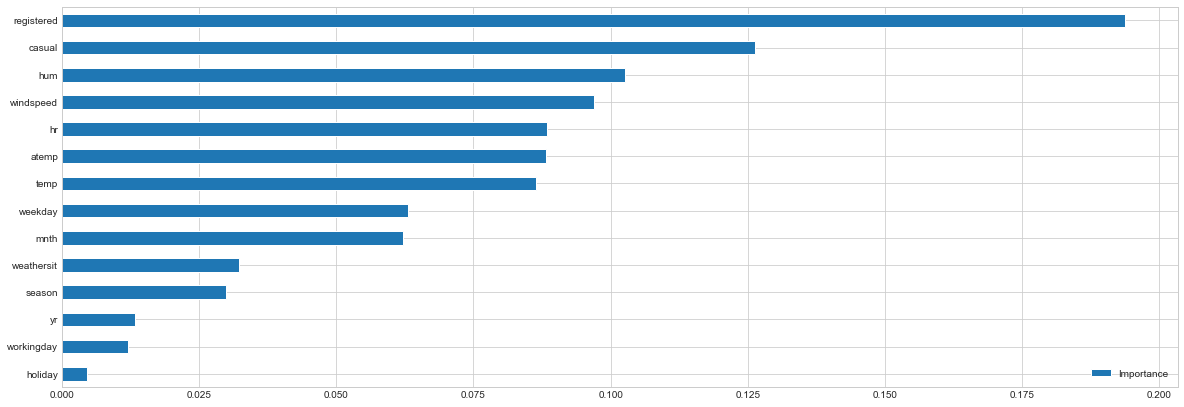

In [36]:
# Using Random Forest to gain an insight on Feature Importance
# ????
clf = RandomForestClassifier()
clf.fit(df.drop('cnt', axis=1), df['cnt'])

plt.style.use('seaborn-whitegrid')
importance = clf.feature_importances_
importance = pd.DataFrame(importance, index=df.drop('cnt', axis=1).columns, columns=["Importance"])
importance.sort_values(by='Importance', ascending=True).plot(kind='barh', figsize=(20,len(importance)/2));

In [40]:
# drop the 'registed' and 'casual' features 
df = df.drop(['registered','casual'],axis = 1)
df.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1


In [85]:
dataset_day.dteday = pd.to_datetime(dataset_day.dteday)
dataset_day.set_index('dteday', inplace=True)

In [74]:
dataset_day.head()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
dteday,,,,,,,,,,,,,,,
2011-01-01,1,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
2011-01-02,2,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2011-01-03,3,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
2011-01-04,4,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
2011-01-05,5,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


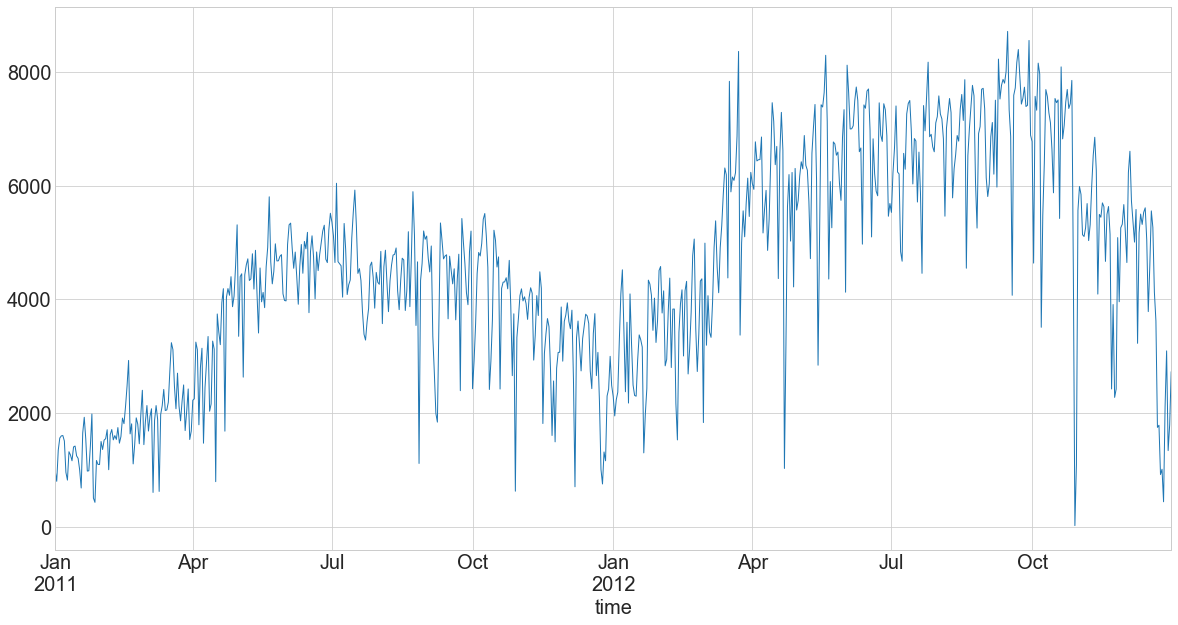

In [82]:
dataset_day.cnt.plot(figsize=(20,10), linewidth=1, fontsize=20)
plt.xlabel('time',fontsize=20);

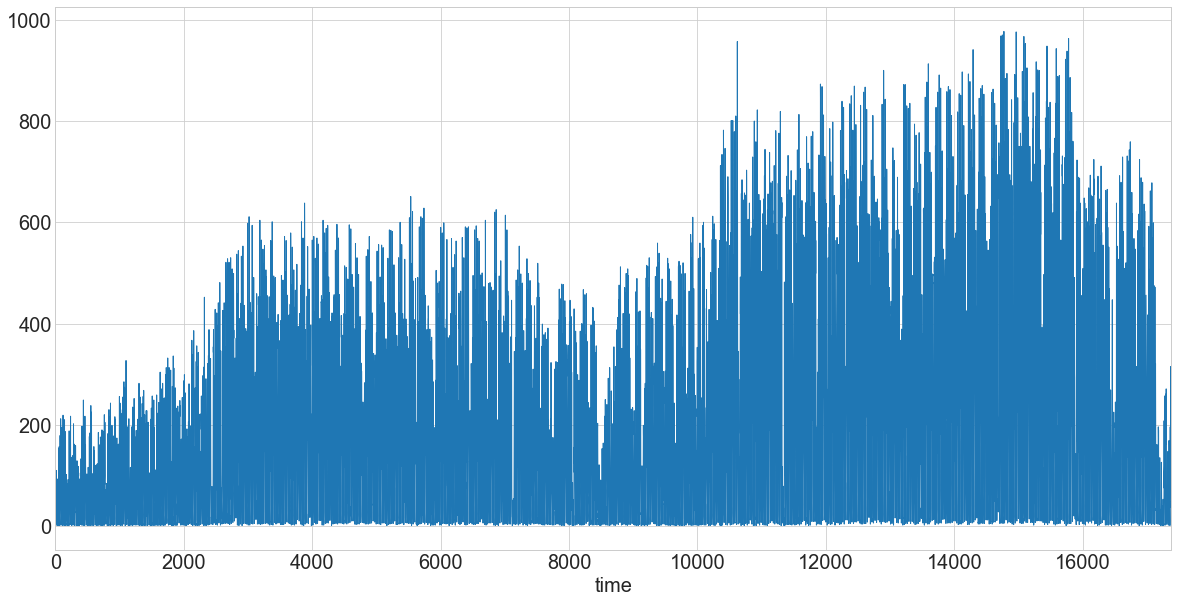

In [80]:
df.cnt.plot(figsize=(20,10), linewidth=1, fontsize=20)
plt.xlabel('time',fontsize=20);

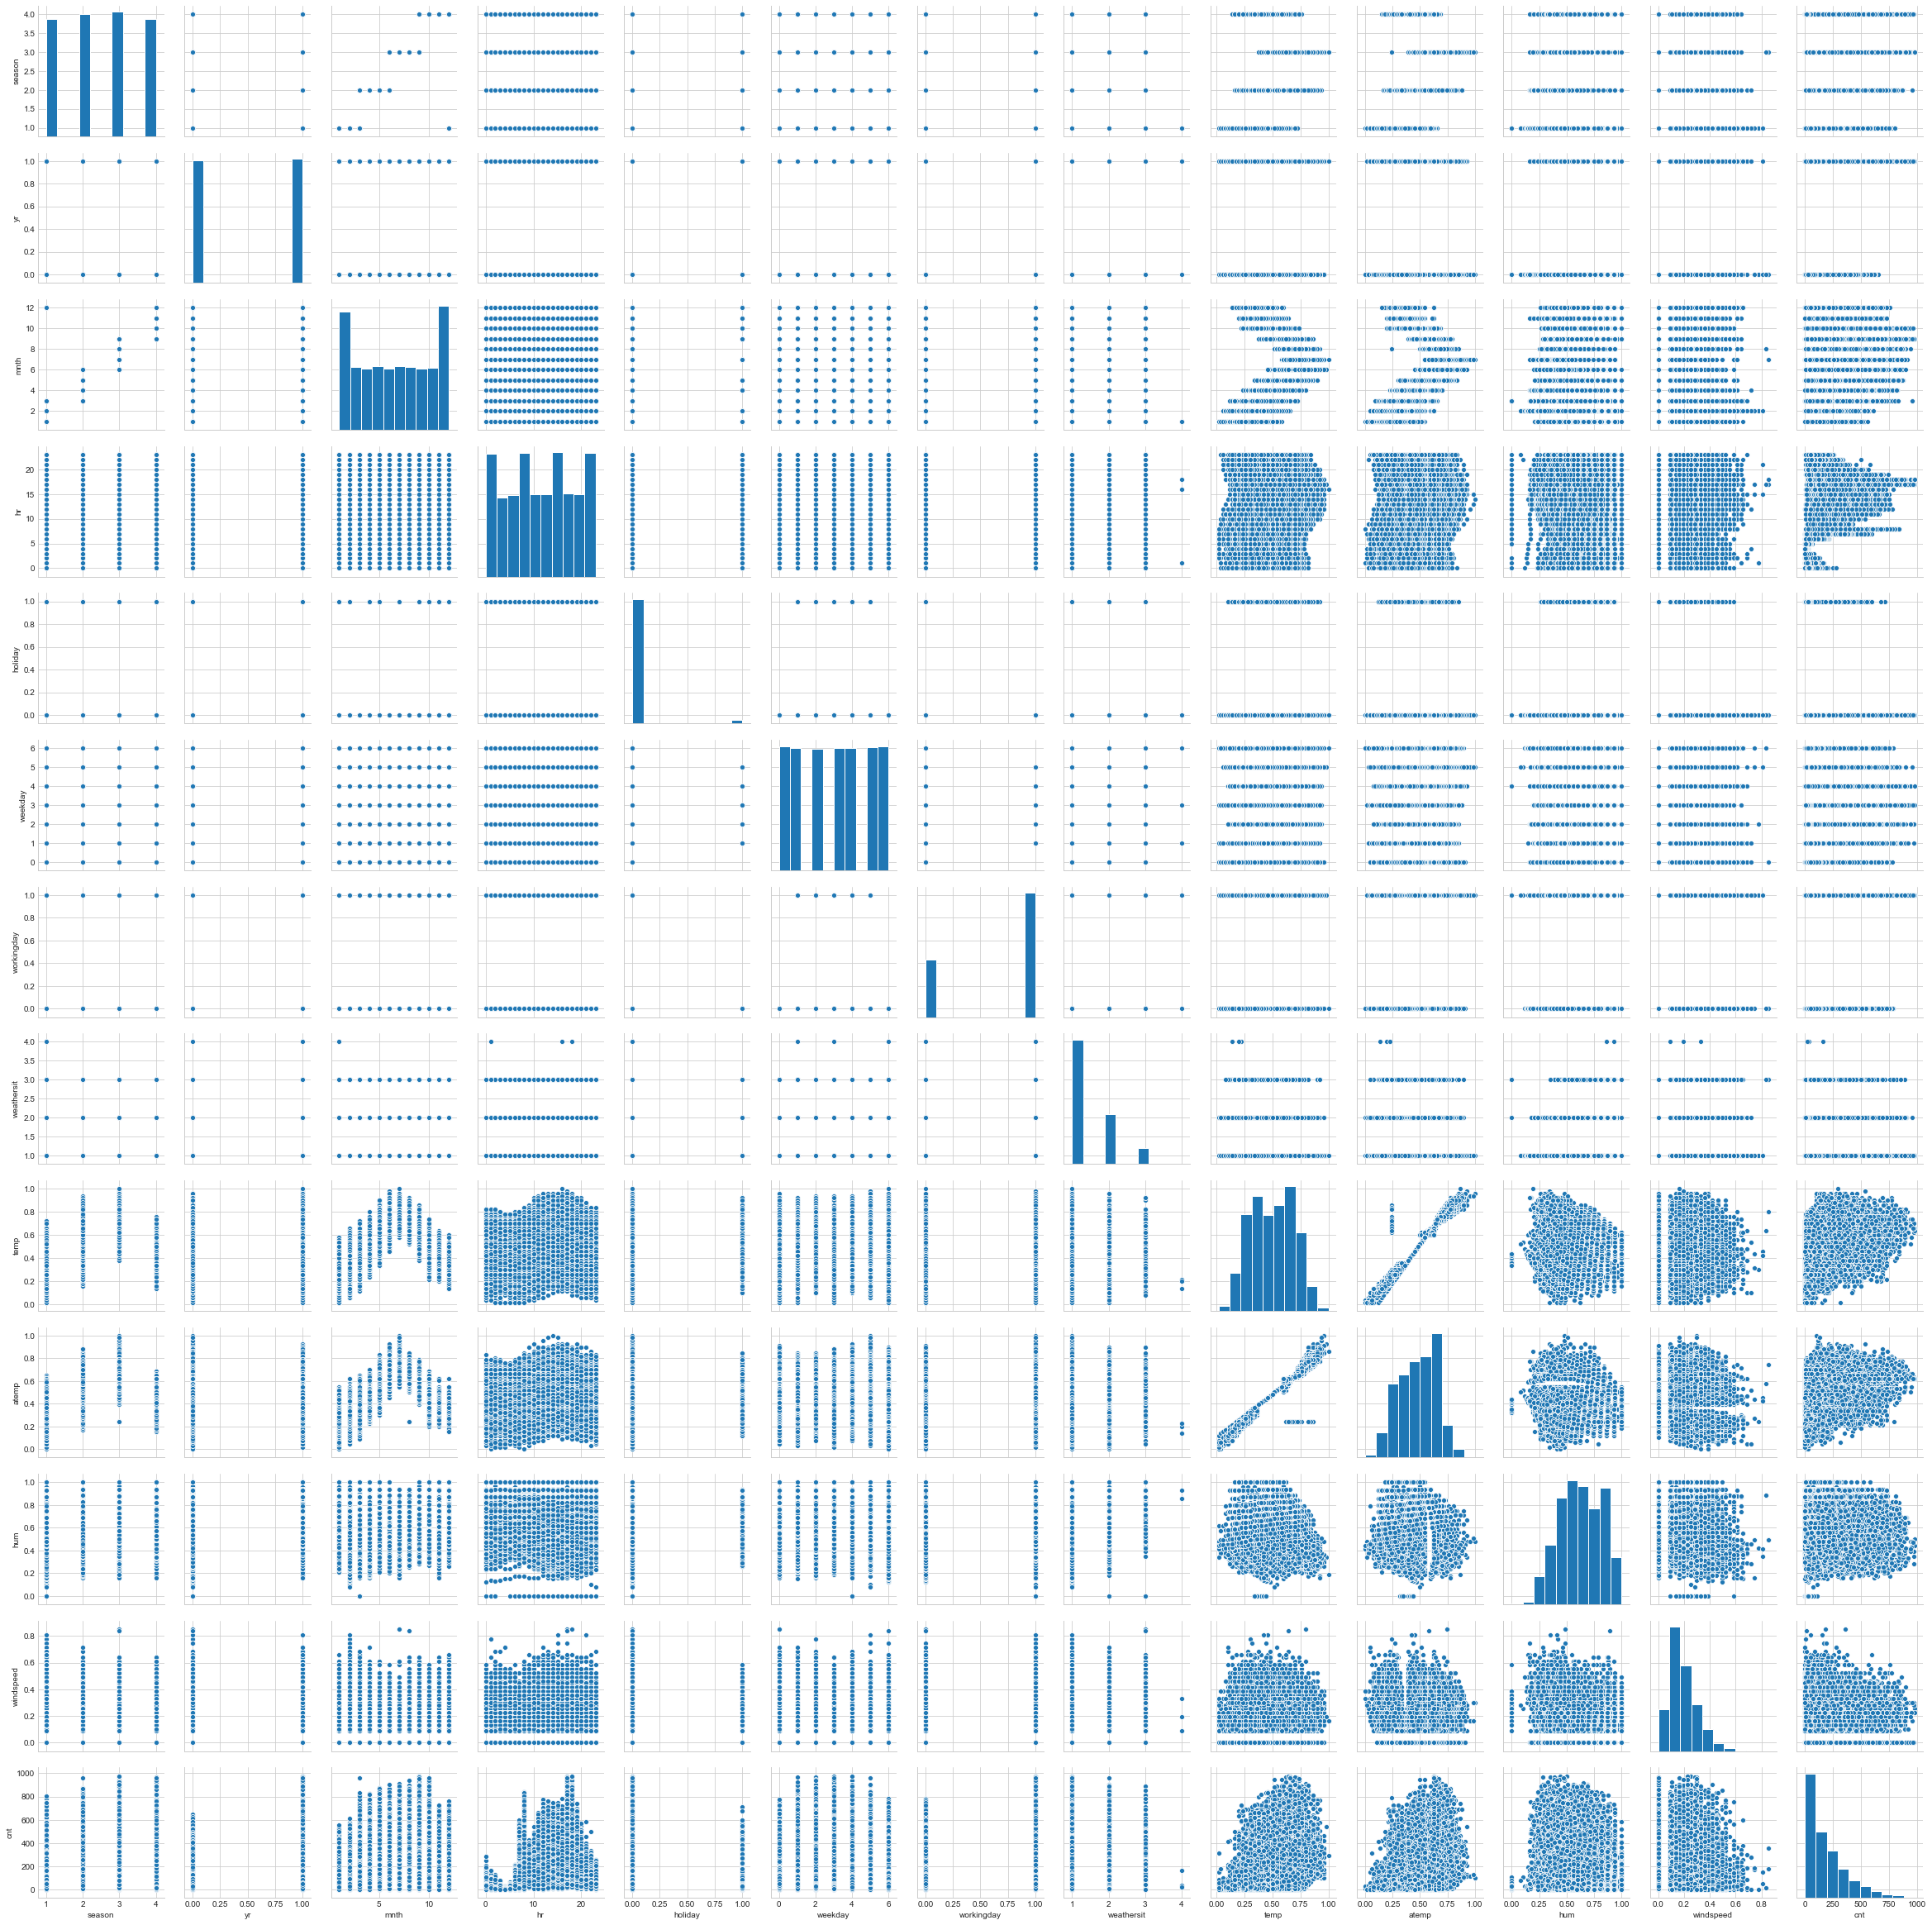

In [90]:
sns.pairplot(df)

In [105]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(['cnt'],axis = 1), df.cnt, test_size=0.2, random_state = 5)
X_train.head(20)

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
13470,3,1,7,11,0,5,1,3,0.72,0.6970,0.74,0.1940
5932,3,0,9,17,0,5,1,1,0.70,0.6667,0.79,0.2537
6114,3,0,9,8,0,6,0,2,0.46,0.4545,0.77,0.2537
6403,4,0,9,9,0,4,1,1,0.62,0.5909,0.78,0.2537
15666,4,1,10,23,0,5,1,1,0.46,0.4545,0.88,0.1045
8260,4,0,12,20,0,4,1,1,0.52,0.5000,0.59,0.3284
14055,3,1,8,20,0,1,1,1,0.74,0.6818,0.62,0.2239
6665,4,0,10,7,1,1,0,1,0.46,0.4545,0.88,0.0000
9478,1,1,2,20,0,6,0,3,0.24,0.2273,0.93,0.1940
7008,4,0,10,15,0,1,1,1,0.56,0.5303,0.60,0.1642


In [91]:
y_train.head()

13470    212
5932     505
6114     108
6403     225
15666    131
Name: cnt, dtype: int64

In [98]:
from sklearn import preprocessing
normalized_X_train = preprocessing.normalize(X_train)
normalized_X_train

array([[0.2038462 , 0.06794873, 0.47564112, ..., 0.04736027, 0.05028206,
        0.01318205],
       [0.14859081, 0.        , 0.44577242, ..., 0.03302183, 0.03912891,
        0.01256583],
       [0.21479292, 0.        , 0.64437876, ..., 0.03254113, 0.05513018,
        0.01816432],
       ...,
       [0.12665683, 0.        , 0.33775154, ..., 0.02622641, 0.0160432 ,
        0.01260235],
       [0.09523975, 0.        , 0.23809938, ..., 0.02453376, 0.03047672,
        0.00639535],
       [0.1702837 , 0.        , 0.42570925, ..., 0.03869697, 0.05704504,
        0.02414623]])

In [101]:
normalized_X_test = preprocessing.normalize(X_test)
normalized_X_test

array([[0.35444038, 0.        , 0.82702756, ..., 0.07876847, 0.09924331,
        0.        ],
       [0.24218053, 0.08072684, 0.64581476, ..., 0.04892854, 0.06296694,
        0.01566101],
       [0.09102641, 0.04551321, 0.13653962, ..., 0.01792765, 0.03003872,
        0.00611242],
       ...,
       [0.23052498, 0.05763125, 0.51868122, ..., 0.03580053, 0.02247619,
        0.0189261 ],
       [0.22630173, 0.        , 0.60347127, ..., 0.06057343, 0.04978638,
        0.01013077],
       [0.28032774, 0.14016387, 0.56065547, ..., 0.04884711, 0.11353273,
        0.01255868]])

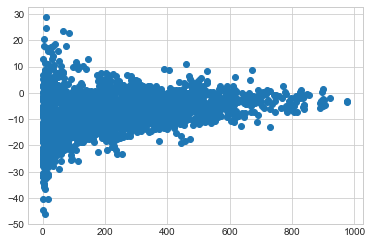

In [104]:
# linear regression model
from sklearn.linear_model import LinearRegression
lm = LinearRegression(normalize=True)
lm.fit(X_train,y_train)
predictions = lm.predict(normalized_X_test)
# visualize the prediction and test
plt.scatter(y_test,predictions)

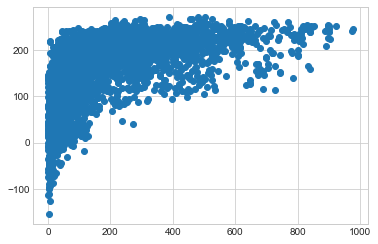

In [102]:
from sklearn.svm import SVR
svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
svr_rbf.fit(normalized_X_train,y_train)
predictions = svr_rbf.predict(normalized_X_test)
plt.scatter(y_test,predictions)

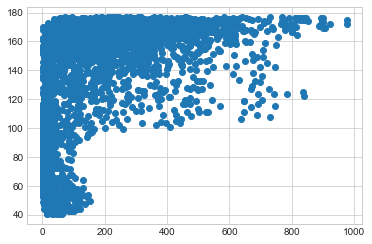

In [109]:
svr_poly = SVR(kernel='poly', C=100, gamma='auto')
svr_poly.fit(normalized_X_train,y_train)
predictions = svr_poly.predict(normalized_X_test)
plt.scatter(y_test,predictions)

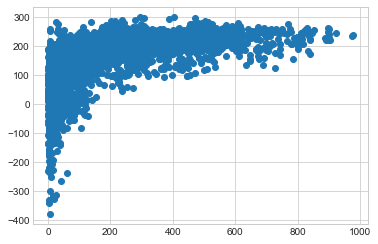

In [108]:
svr_linear = SVR(kernel='linear', C=100, gamma='auto', degree=3, epsilon=.1,coef0=1)
svr_linear.fit(normalized_X_train,y_train)
predictions = svr_linear.predict(normalized_X_test)
plt.scatter(y_test,predictions)

In [115]:
import xgboost as xgb
xgb_m= xgb.XGBRegressor(colsample_bytree=0.2,
                       gamma=0.0,
                       learning_rate=0.05,
                       max_depth=6,
                       min_child_weight=1.5,
                       n_estimators=7200,
                       reg_alpha=0.9,
                       reg_lambda=0.6,
                       subsample=0.2,
                       seed=42,
                       silent=1)

xgb_m.fit(normalized_X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.2, gamma=0.0, importance_type='gain',
       learning_rate=0.05, max_delta_step=0, max_depth=6,
       min_child_weight=1.5, missing=None, n_estimators=7200, n_jobs=1,
       nthread=None, objective='reg:linear', random_state=0, reg_alpha=0.9,
       reg_lambda=0.6, scale_pos_weight=1, seed=42, silent=1,
       subsample=0.2)

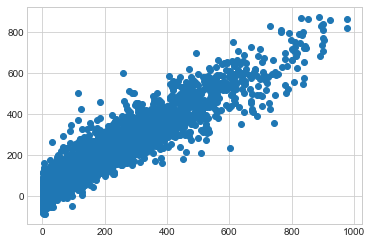

In [116]:
predictions = xgb_m.predict(normalized_X_test)
plt.scatter(y_test,predictions)

In [117]:
from sklearn.metrics import r2_score
r2_score(y_test,predictions)

0.8812803539901689

In [150]:
# from sklearn.preprocessing import OneHotEncoder
# season/0	yr/1	mnth/2	hr/3	holiday/4	weekday5 workingday6 weathersit7	temp8	atemp9	hum	windspeed10
enc = OneHotEncoder(categorical_features = [0,2,3,5,7])
ohe_X_train = enc.fit_transform(X_train)
ohe_X_train

/Users/zijian/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/Users/zijian/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:392: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


<13903x58 sparse matrix of type '<class 'numpy.float64'>'
	with 140206 stored elements in COOrdinate format>

In [152]:
ohe_X_test = enc.fit_transform(X_test)
ohe_X_test

/Users/zijian/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/Users/zijian/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:392: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


<3476x58 sparse matrix of type '<class 'numpy.float64'>'
	with 35100 stored elements in COOrdinate format>

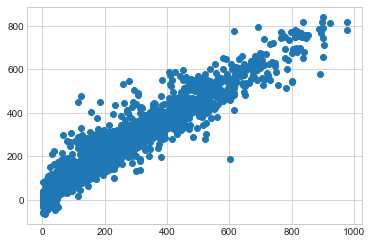

In [160]:
from sklearn.model_selection import KFold
svr_rbf = SVR(kernel='rbf', C=200, gamma=0.1, epsilon=.1)
svr_rbf.fit(ohe_X_train,y_train)
predictions = svr_rbf.predict(ohe_X_test)
plt.scatter(y_test,predictions)

In [161]:
r2_score(y_test,predictions)

0.932016866192419

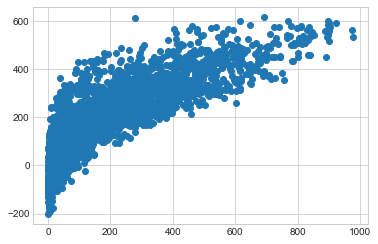

In [156]:
# linear regression model
lm = LinearRegression()
lm.fit(ohe_X_train,y_train)
predictions = lm.predict(ohe_X_test)
# visualize the prediction and test
plt.scatter(y_test,predictions)

In [157]:
r2_score(y_test,predictions)

0.6975452253114466

In [166]:
from sklearn.model_selection import GridSearchCV
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3], 'C': [100,500,1000]},
                    {'kernel': ['linear'], 'gamma': [0.1, 0.2, 0.3], 'C': [100, 500,1000]}]
clf = GridSearchCV(SVR(), tuned_parameters, cv=5, scoring = 'r2')
clf.fit(ohe_X_train, y_train)
print(cv_results_)

NameError: name 'cv_results_' is not defined

In [167]:
print(clf.cv_results_)

{'mean_fit_time': array([  9.25298395,  12.61156774,  14.67579041,  25.09990649,
        61.61131511,  83.59810529,  50.39463606, 133.95574837,
       126.26367302,  10.76402154,  10.30782967,  10.62312431,
        21.81643348,  21.45670681,  21.21370769,  34.25360875,
        34.41409521,  34.24864697]), 'std_fit_time': array([ 0.04612673,  0.27878101,  0.07892954,  0.66826818,  3.66617467,
        2.14479507,  4.00459613,  4.74281989, 10.65913195,  0.58835115,
        0.41911473,  0.3179254 ,  1.04668814,  0.80594575,  0.71420736,
        1.38043638,  1.27462768,  1.33337845]), 'mean_score_time': array([1.42162814, 1.41590977, 1.41594357, 1.40914483, 1.41120763,
       1.41035862, 1.42835317, 1.40944171, 1.42316861, 1.35542769,
       1.30970888, 1.35713425, 1.29991522, 1.33288493, 1.28716755,
       1.34749899, 1.2979898 , 1.29336939]), 'std_score_time': array([0.00441466, 0.00538276, 0.00389837, 0.00327577, 0.00582632,
       0.00296197, 0.0253925 , 0.00343844, 0.01772149, 0.056554

In [168]:
clf.best_score_ 

0.9370725487285304

In [169]:
clf.best_params_ 

{'C': 1000, 'gamma': 0.1, 'kernel': 'rbf'}

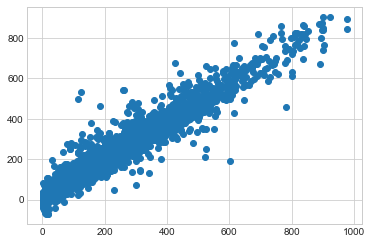

In [171]:
svr_rbf = SVR(kernel='rbf', C=1500, gamma=0.1, epsilon=.1)
svr_rbf.fit(ohe_X_train,y_train)
predictions = svr_rbf.predict(ohe_X_test)
plt.scatter(y_test,predictions)

In [172]:
r2_score(y_test,predictions)

0.9433298309503838

In [174]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,predictions)

27.083818016365438

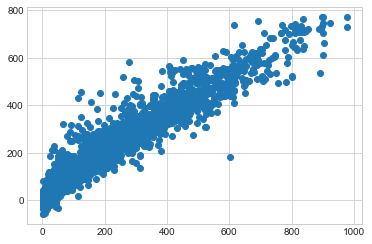

In [175]:
svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
svr_rbf.fit(ohe_X_train,y_train)
predictions = svr_rbf.predict(ohe_X_test)
plt.scatter(y_test,predictions)

In [176]:
mean_absolute_error(y_test,predictions)

32.86064921058338

In [177]:
r2_score(y_test,predictions)

0.9181702261700464

In [178]:
svr_rbf

SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)